# Galaxy Merger Simulation of Two Disk Galaxies with N = 20,000
\
This program shows the user how to set up and run a simulation between two disk galaxies, and how to complete a preliminary analysis of the results. The disk galaxy models were generated using the Agama package (Vasiliev, 2018), and are in quasi-equilibrium when simulated in isolation. Due to the algorithm scaling as O(N$^2$), many of the important components found in spiral galaxies such as gas, dark matter, central black hole, and bulge were omitted, which are integral in keeping the model in equilibrium. This program simulates the interaction between a 10:1 merger of a larger galaxy and a smaller satellite galaxy in a violent collision event.

***
Please ensure MSG_Nbody is installed via pip before running the program. 

***

In [1]:
from MSG_Nbody import *

## Setup Initial Conditions

In [3]:
# load in initial positions, velocities, and masses for host galaxy
host_pos, host_vel, host_mass = load_initial_conditions('Initial_Conditions/disk_galaxy_N10000')

# scale satellite galaxy 
initial_mass = np.sum(host_mass)
# divide by the total mass to normalize the satellite galaxy mass
R = 1/initial_mass
M = 1/initial_mass
sat_pos, sat_vel, sat_mass = scale_initial_positions(host_pos, host_vel, host_mass, R, M)

# scale host galaxy initial conditions
host_pos, host_vel, host_mass = scale_initial_positions(host_pos, host_vel, host_mass, 1.0, 3.9)

print(f'final satellite disk galaxy mass: {np.sum(sat_mass)}')
print(f'final host disk galaxy mass: {np.sum(host_mass)}')

# rotate around y axis by 45º and -30º
sat_pos, sat_vel = rotate_disk(sat_pos, sat_vel, 45, 'y')
host_pos, host_vel = rotate_disk(host_pos, host_vel, -30, 'y')

# calculate the escape velocity of the satellite galaxy placed at x=50,y=30,z=15
P0 = [50.0, 30.0, 15.0]
escape_velocity = compute_escape_velocity(P0[0], P0[1], P0[2], np.sum(host_mass))
print(f'escape velocity: {escape_velocity}')

# initial velocity for satellite galaxy's collision course
V0 = [-0.25, -0.25, -0.1]
print('magnitude of satellite galaxy trajectory velocity: ', np.sqrt(V0[0]**2 + V0[1]**2 + V0[2]**2))
# move satellite galaxy to its initial position
sat_pos += P0
# give the satellite galaxy a velocity in the negative x direction less than the escape velocity to put it on a collision path
# the velocity is negative because, from the satellite galaxy, the host galaxy is in the negative x direction
sat_vel += V0
# flip the direction of rotation of the host galaxy for stronger gravitational tidal forces
host_vel = host_vel*-1

# cocatenate initial conditions
pos_list = [host_pos, sat_pos]
vel_list = [host_vel, sat_vel]
mass_list = [host_mass, sat_mass]
positions, velocities, masses = concatenate_initial_conditions(pos_list, vel_list, mass_list)

# display the initial simulation setup!
dt = 0.1
timesteps = 5000
plot_orbital_trajectory(pos_list, vel_list, mass_list, dt, timesteps, scale=80, plot_glxys=True)

final satellite disk galaxy mass: 1.0000000000000004
final host disk galaxy mass: 10.077422160000001


## N-body Simulation Loop

In [ ]:
# run N-body simulation
MSG_Nbody(positions, velocities, masses, 0.1, 2000, snapshot_save_rate=10)

simulation running....  /ᐠ –ꞈ –ᐟ\<[pls be patient]


100%|████████████████████████████████████| 2000/2000 [27:23:39<00:00, 49.31s/it]


'simulation complete [yay!!! (ﾐΦ ﻌ Φﾐ)✿ *ᵖᵘʳʳ*]'

## Simulation Analysis


In [59]:
directory = 'simulation_outputs_N20000/*'
N_per_galaxy = [10000, 10000]
positions, velocities, potentials = load_simulation_outputs(directory, N_per_galaxy)

100%|███████████████████████████████████████| 201/201 [00:00<00:00, 2464.78it/s]


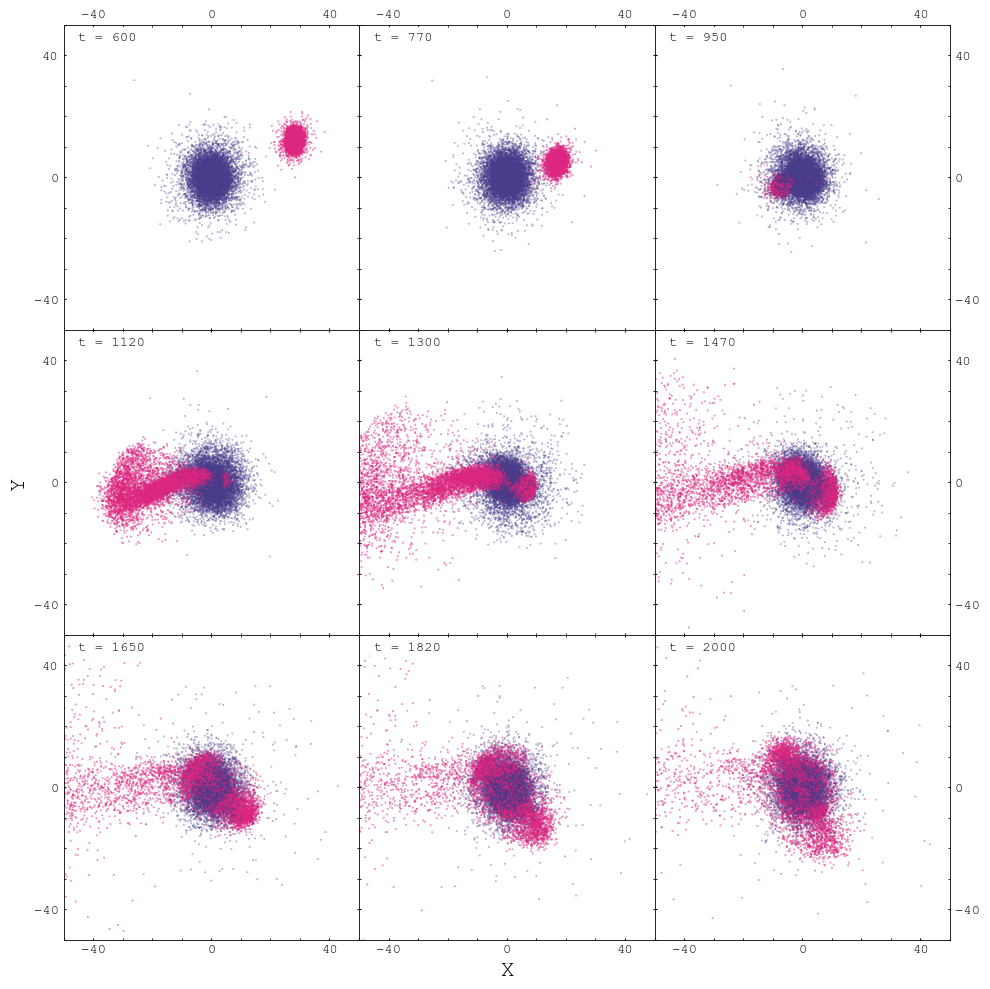

In [76]:
t = np.linspace(60, 200, 9)
plot_grid3x3(positions, timesteps=t, axes=[0,1], sort=True, scale=50)

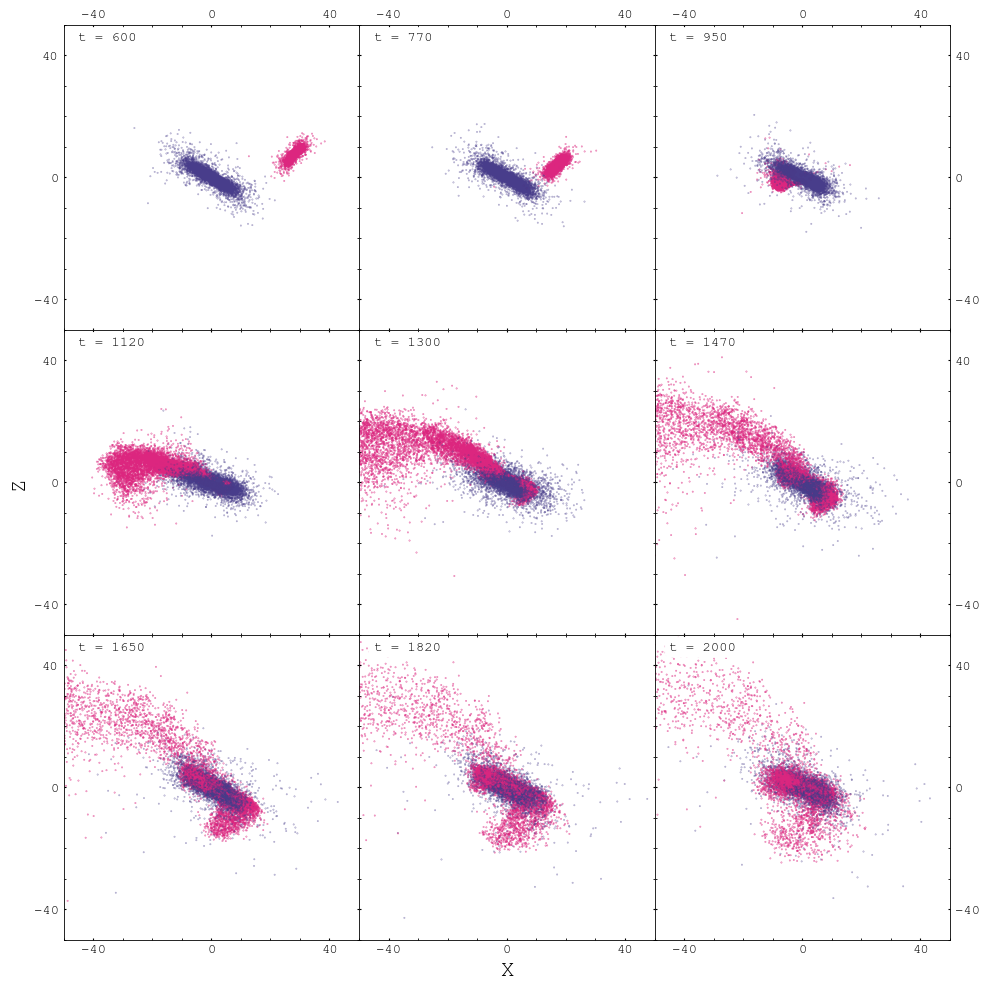

In [77]:
plot_grid3x3(positions, timesteps=t, axes=[0,2], sort=True, scale=50)

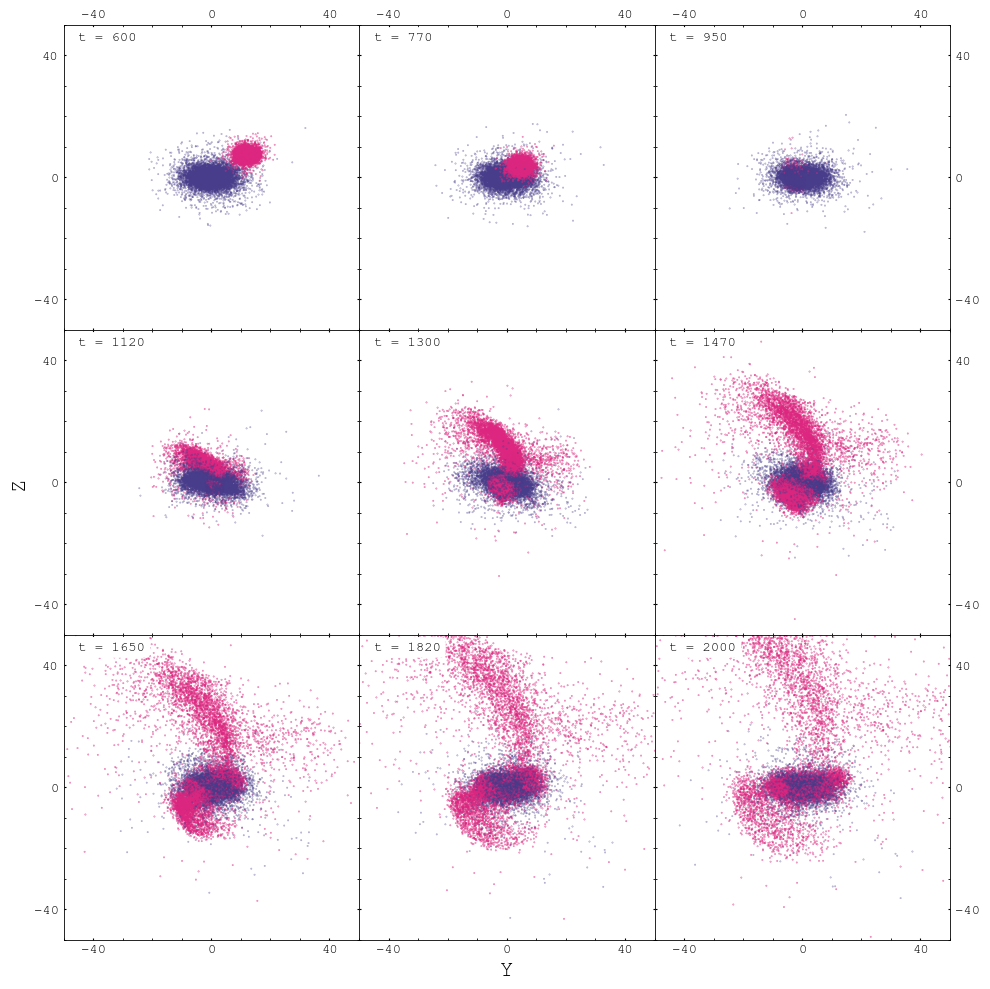

In [78]:
plot_grid3x3(positions, timesteps=t, axes=[1,2], sort=True, scale=50)

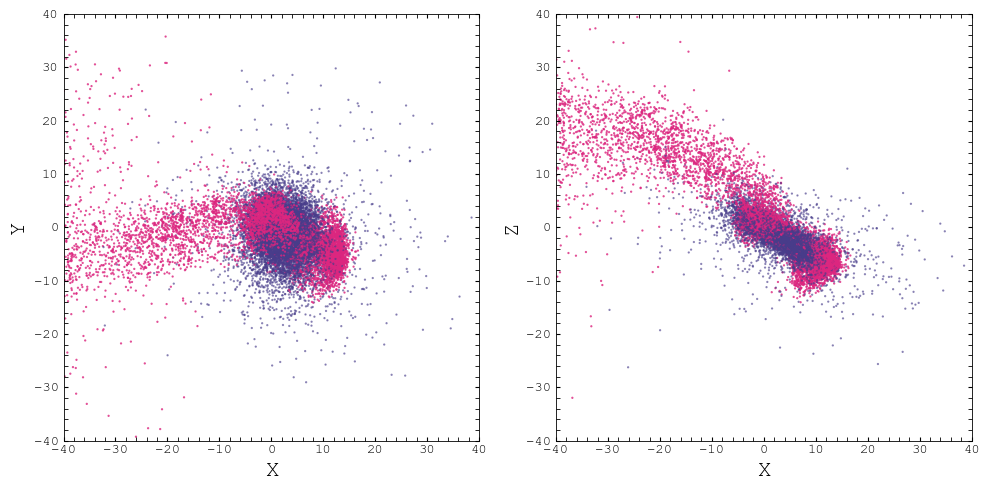

In [61]:
t = 147
display_galaxies(positions, t, sort=True, scale=40)

shifting frame of reference: 100%|██████████| 201/201 [00:00<00:00, 1376.47it/s]


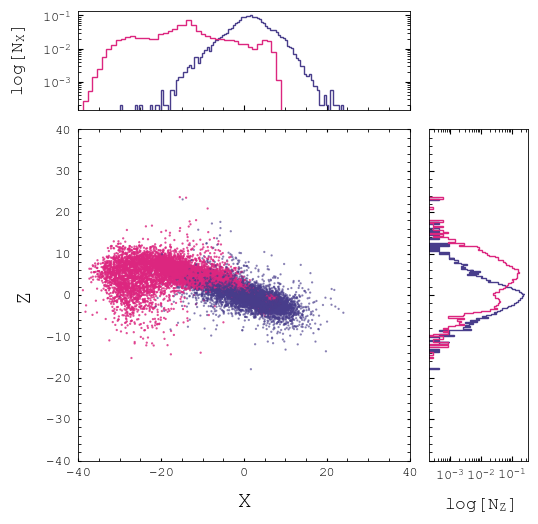

In [15]:
# shift to global center of mass frame
positions, velocities = shift_2_com_frame(positions, velocities, masses)

t = 112
plot_density_histogram(positions, t, [0,2], sort=True, scale=40)

shifting frame of reference: 100%|██████████| 201/201 [00:00<00:00, 1749.99it/s]


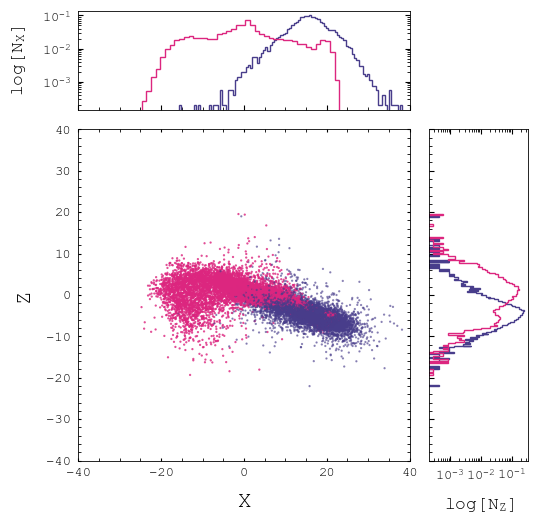

In [16]:
# shift to center of mass frame of satellite galaxy
positions, velocities = shift_2_com_frame(positions, velocities, sat_mass, galaxy_idx=1)

t = 112
plot_density_histogram(positions, t, [0,2], sort=True, scale=40)

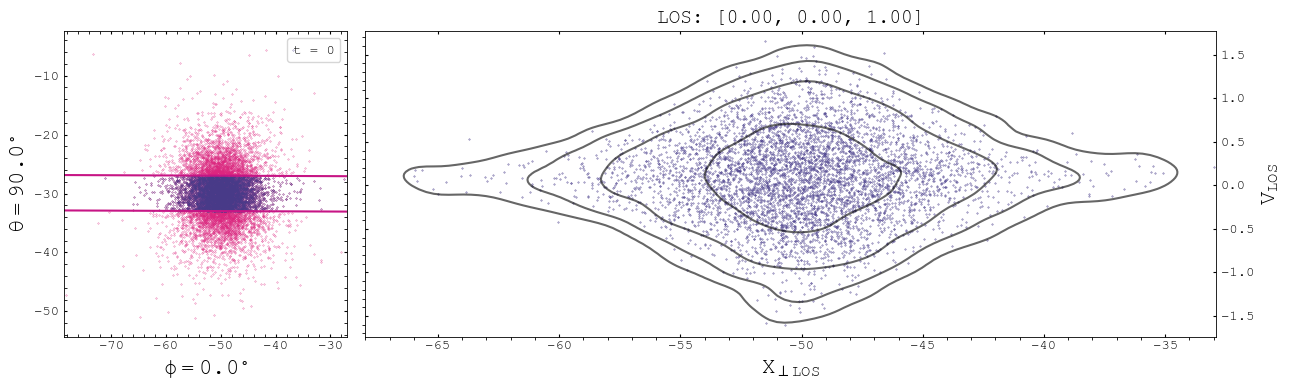

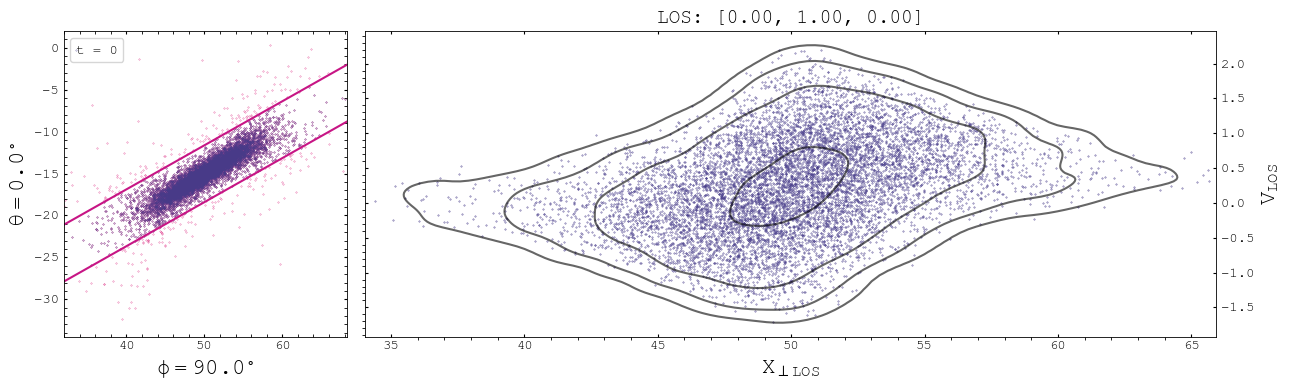

In [17]:
gal1_pos = positions[0]
gal1_vel = velocities[0]
# z axis los vector (xy projection)
t = 0
los_vector = [0,0,1]
width = 3
plot_PVD(gal1_pos, gal1_vel, t, los_vector, width)

# y axis los vector (xz projection)
los_vector = [0,1,0]
plot_PVD(gal1_pos, gal1_vel, t, los_vector, width)

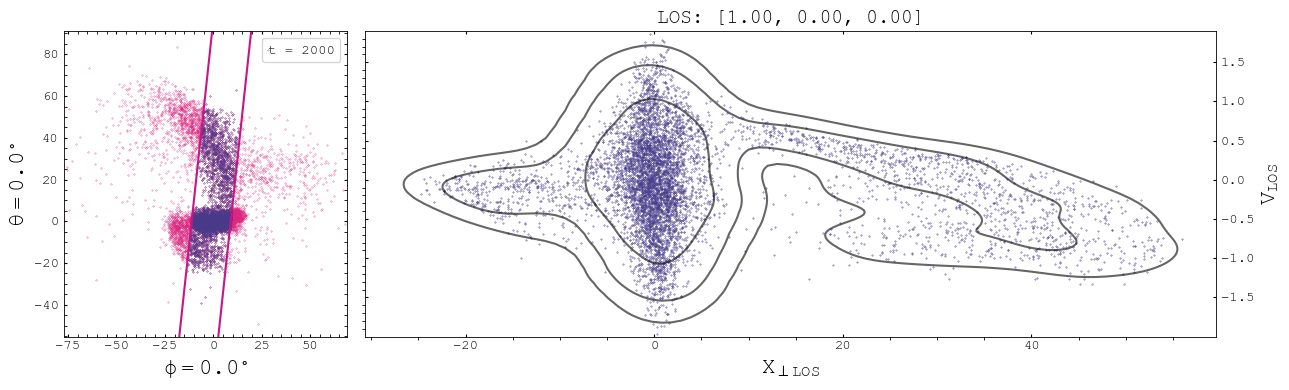

In [74]:
gal2_pos = positions[1]
gal2_vel = velocities[1]
# z axis los vector (xy projection)
t = 200
los_vector = [1,0,0]
width = 10

# with transpose = True, we now plot the positions along the 'y' axis instead of along the 'x' axis
# which shows the best PVD for the timestep
plot_PVD(gal2_pos, gal2_vel, t, los_vector, width, m_shift=-40, b_shift=1, transpose=True)

## Plotting Energies

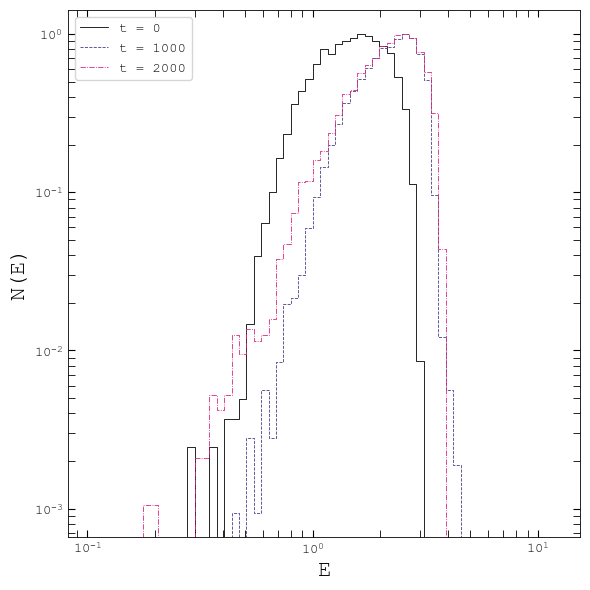

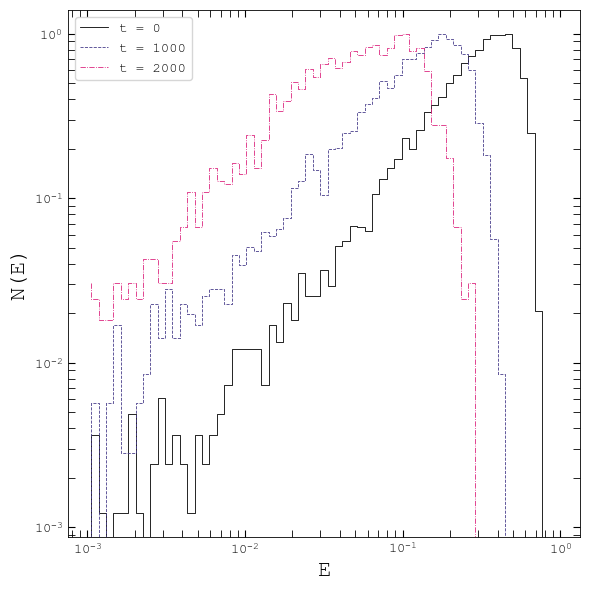

In [79]:
energies = compute_relative_energy(velocities, potentials)

# plot the energy distribution of the satelite galaxy
t = [0, 100, 200]
plot_Ne(energies[0], t, bin_min=-1, bin_max=1.1)
plot_Ne(energies[1], t, bin_min=-3, bin_max=0)

Hernquist Galaxy Params:


mass of galaxy M:  10
scale length of galaxy a:  2
number of particles N:  10000


calculating g(E): 100%|███████████████████| 4999/4999 [00:00<00:00, 5326.80it/s]


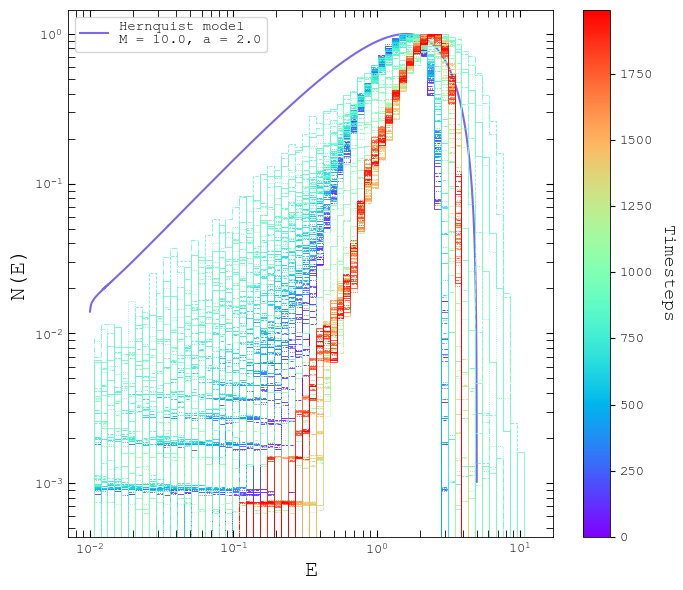

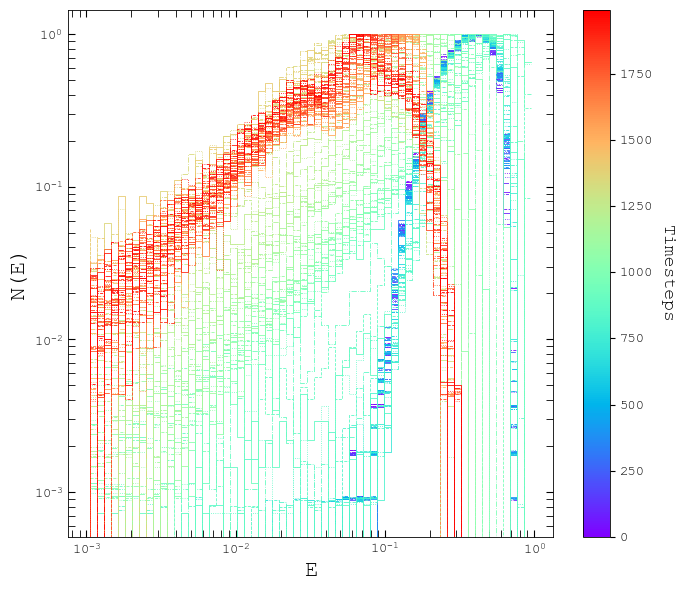

In [35]:
t = np.arange(0, 200, 1)
plot_Ne(energies[0], t, bin_min=-2, bin_max=1.1, plot_hernquist=True)
plot_Ne(energies[1], t, bin_min=-3, bin_max=0)

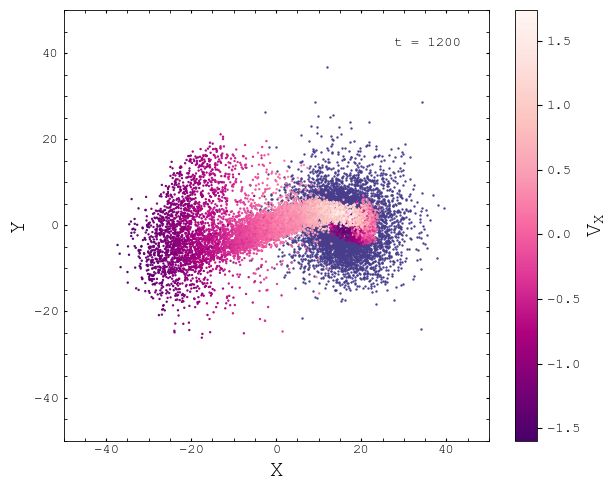

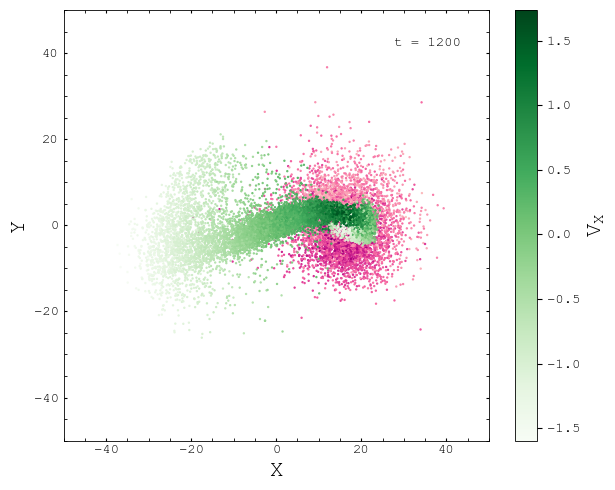

In [36]:
t = 120
vx_gal1 = velocities[0][t,:,0]
vx_gal2 = velocities[1][t,:,0]
plot_2D(positions, t, [0,1], cmap={1:vx_gal2})
plot_2D(positions, t, [0,1], cmap={0:vx_gal1, 1:vx_gal2}, cb_idx=1)

In [55]:
host_galaxy_N = 10000

N_per_galaxy = [host_galaxy_N, 5000, 5000]
positions, velocities, potentials = load_simulation_outputs(directory, N_per_galaxy)

100%|███████████████████████████████████████| 201/201 [00:00<00:00, 2256.12it/s]


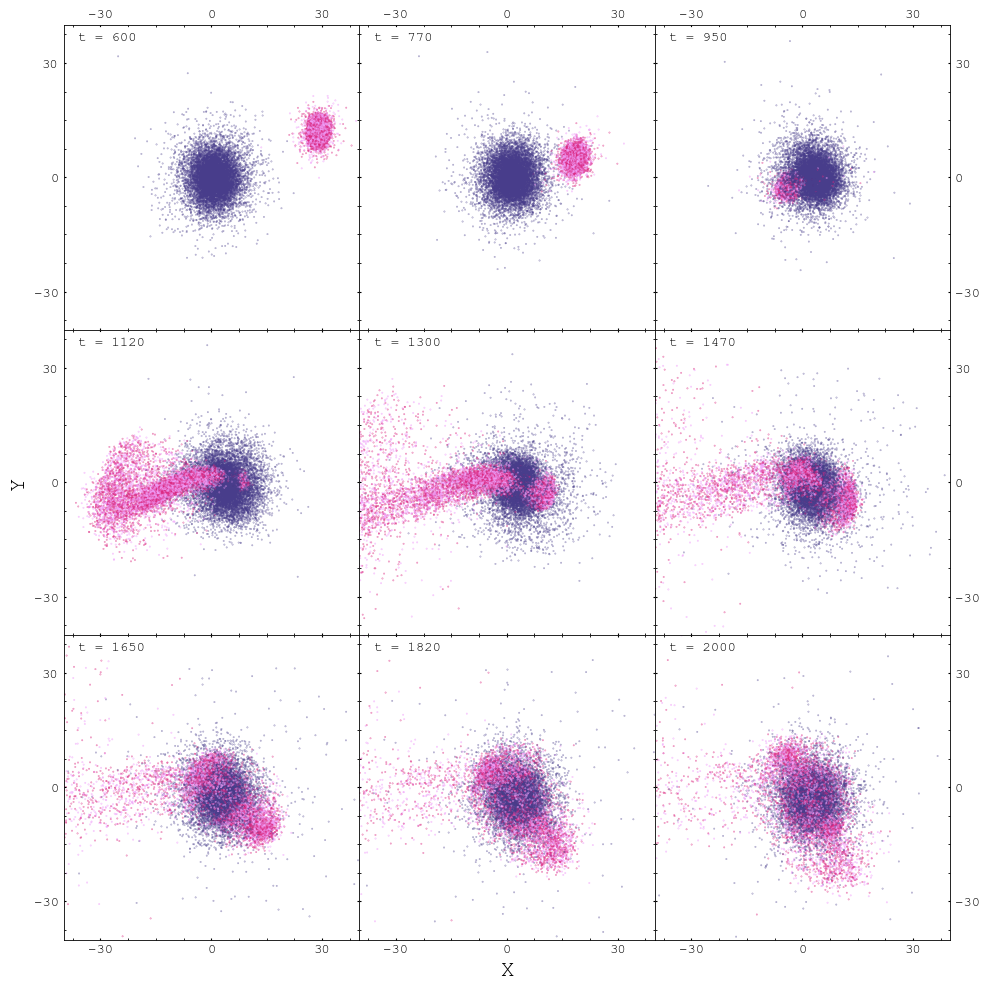

In [56]:
t = np.linspace(60, 200, 9)
plot_grid3x3(positions, timesteps=t, axes=[0,1], sort=True, scale=40)

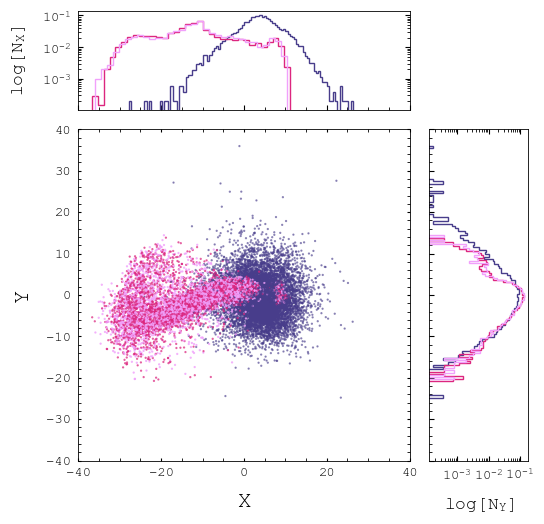

In [57]:
t = 112
plot_density_histogram(positions, t, [0,1], sort=True, scale=40)

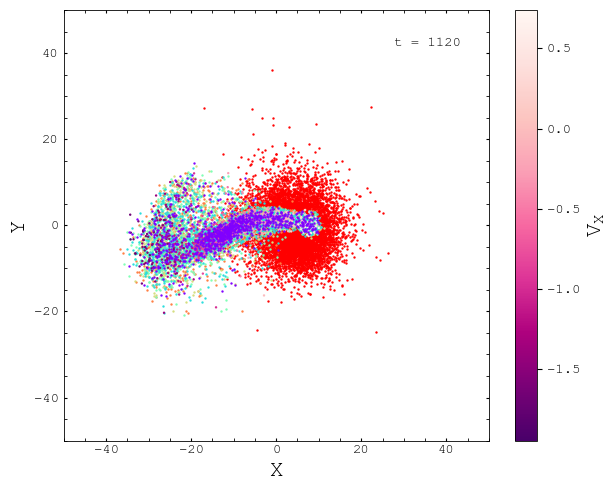

In [51]:
plot_2D(positions, t, [0,1], cmap={5: velocities[5][100,:,0]})

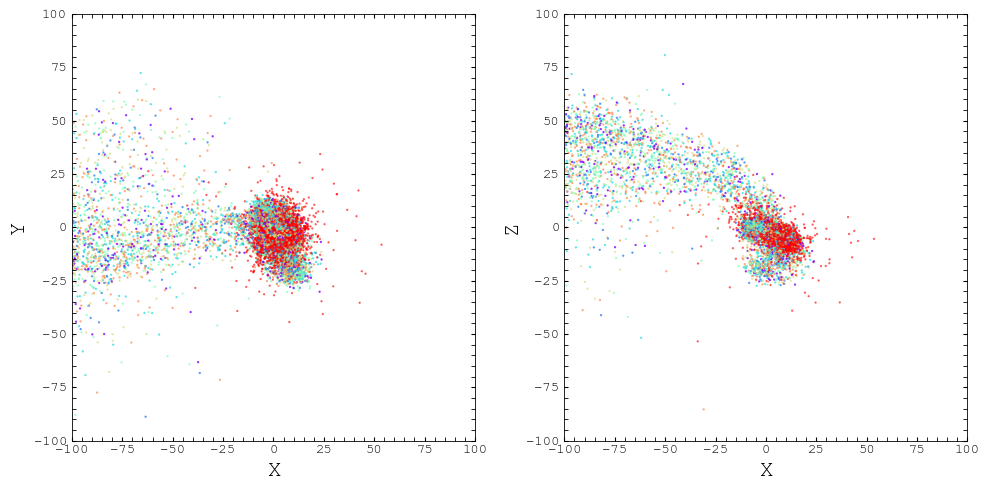

In [52]:
t = 200
display_galaxies(positions, t, sort=True)